# Laboratorio 3 
## Ciencias de Datos en Python

*20240228*
**Diego Morales**

Para este laboratorio deberá entregar el link de GitHub a un Notebook de Jupyter con todo el código y comentarios que considere necesario para dar solución a lo planteado, copie la pregunta en una celda de Markdown y de solución a la misma con las celdas de código de Python.

### Parte 1: Numpy

Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

In [2]:
import numpy as np

1. ¿Cuál es el tamaño en bytes de un array de 1000
elementos de tipo booleano?

In [3]:
np.full(1000, True, dtype=bool).nbytes

1000

2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [4]:
np.arange(100, 1, -2)[-10:]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

3. Dado el array

2456

0374

8852

1561

Seleccione con una instrucción el subarray de elementos

0374

Después, seleccione el subarray de elementos

25

85

In [21]:
array = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])
print(f'subarray 1: {array[1]}')
print(f'subarray 2: {array[0:3:2, 0:3:2]}')

subarray 1: [0 3 7 4]
subarray 2: [[2 5]
 [8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [23]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

np.mean(a-b)

-0.25

5. Tengo valores de cordenadas (x, y) en las columnas del array

   1.33 4.5

   30.0 10.7
   
   70.2 0.5

Agregue a este array las coordenadas (37.1, -3.6).
Muestre en pantalla las dimensiones del nuevo
array.

In [62]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
nuevas = np.array([[37.1, -3.6]])
coordenadas = np.append(coordenadas, nuevas, axis=0)

print(coordenadas)
print(coordenadas.shape)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
(4, 2)


6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [64]:
coordenadas_2 = coordenadas.copy()
coordenadas_2 = coordenadas_2.T
nuevas_2 = np.array([[10.8, 3.0], [35.8, 12.0]])
coordenadas_2 = np.append(coordenadas_2, nuevas_2.T, axis=1)

print(coordenadas_2)
print(coordenadas_2.shape)

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]
(2, 6)


### Parte 2: Pandas

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NucleosPoblacion.csv')
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1. ¿Cuántos Municipios tienen más de 100000 habitantes?

In [176]:
muni_1_millon = (df
    [df.Poblacion>1e6]
    .Municipio
    .count()
)

print(f'{muni_1_millon} Municipios tienen más de 1,000,000 de habitantes')

2 Municipios tienen más de 1,000,000 de habitantes


2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda:

- ¿Cuál es la segunda ciudad más poblada?
- ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

La segunda ciudad más poblada es Barcelona
Granada ocupa la posición 17


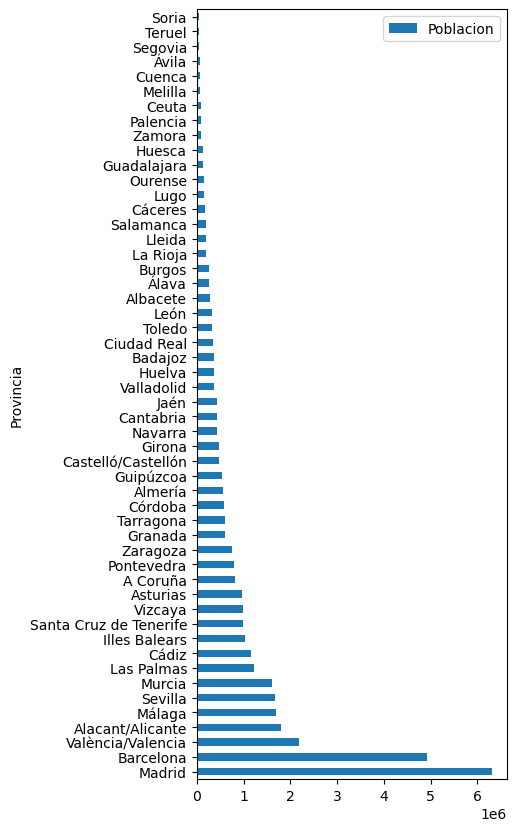

In [212]:
provincias = (df
    .groupby(by='Provincia', as_index=False)
    .Poblacion
    .sum()
    .sort_values(by='Poblacion', ascending=False)
    .set_index('Provincia')
)

provincias.plot(kind='barh',figsize=(4, 10))
segunda_ciudad = provincias.index[1] # los indices inician en 0
print(f'La segunda ciudad más poblada es {segunda_ciudad}')
posiciones = provincias.reset_index()
pos_granada = posiciones[posiciones.Provincia=='Granada'].index[0]+1 # los indices inician en 0
print(f'Granada ocupa la posición {pos_granada}')

3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [180]:
muni_extremadura = (df
    [(df.Provincia.isin(['Cáceres', 'Badajoz']))
     & (df.Poblacion>5000)]
     .shape[0]
)

print(f'{muni_extremadura} municipios de Extremadura tienen más de 5,000 habitantes')

14 municipios de Extremadura tienen más de 5,000 habitantes


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [211]:
muni_norte = (df
    [df.Y==df.Y.max()]
)

print(f'El municipio situado más al Norte es {muni_norte["Municipio"].values[0]} de la Provincia de {muni_norte["Provincia"].values[0]} con una Población de {muni_norte["Poblacion"].values[0]}')

El municipio situado más al Norte es Viveiro de la Provincia de Lugo con una Población de 16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada. 

6. Realice un histograma con la población de los Municipios para cada una de las provincias.


7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

8. Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.